In [3]:
import baltic as bt
import pandas as pd
import numpy as np
import json
import os
import matplotlib.pyplot as plt
import itertools
from collections import defaultdict

In [4]:
def load_tree(gene):
    path = f'./auspice/h3nx_{gene}.json'
    mytree, mymeta = bt.loadJSON(path)
    return(mytree)

In [5]:
def host_subtrees(mytree, traitName, host_order, min_leaves):
    
    mytree.root.traits[traitName]='ancestor' ## give root node some trait value that's different from what the actual tree root has, so it registers as a switch

    host_trees={host:[] for host in host_order}

    for k in sorted(mytree.Objects,key=lambda x:x.height):
        kp=k.parent     # kp is the parent node of k

        # get current node's (k) and its parent's (kp) trait states
        kloc=k.traits[traitName]   # kloc = trait of k; kc = trait of k; they are the same thing
        if traitName in k.parent.traits:  # if parent has a trait block, use that trait, else assign to ancestor
            kploc=kp.traits[traitName]     # kploc = trait of parental node
        else:
            kploc='ancestor'
        
        # print(k.traits)
        # print(f"kploc = {kploc}")
        # print(f"kloc = {kloc}") 

        # if states do not match
        if kloc!= "ancestor" and kloc != kploc:      # if node and parental node do not have the same trait
            #N_children=len(k.leaves)
            traverse_condition=lambda w:w.traits[traitName]==kloc     # traverse tree for all nodes whose traitname = kc
            # print('subtree resulting from '+kploc+' > '+kloc+' switch, traversing within '+ kloc)

            subtree=mytree.subtree(k,traverse_condition=traverse_condition) ## this function returns a new baltic object that contains a trait-traversed subtree, starting from node k, for as long as the traversal stays within the starting trait value state

            if subtree != None:
                clade_leaves = [leaf for leaf in subtree.getExternal() if k.traits["host"] == kloc]
                if len(clade_leaves) >= min_leaves:
                    subtree.traverse_tree()
                    subtree.sortBranches()
                    host_trees[kloc].append((kploc,subtree))
                    
    return(host_trees)

In [6]:
list_of_genes = ["HA", "PB1", "PB2","PA","MP","NP","NA","NS"]

host_trees = {gene:[] for gene in list_of_genes}

for gene in list_of_genes:
    mytree = load_tree(f"{gene}")
    host_order = ['Avian', 'Canine','Swine', 'Human', 'Mink', 'Seal', 'Equine', 'Camel', 'Feline']

    host_trees[gene] = host_subtrees(mytree, "host", host_order, 10)

# print(host_trees)


Tree height: 111.585148
Tree length: 10969.868279
annotations present

Numbers of objects in tree: 9391 (4181 nodes and 5210 leaves)


Tree height: 100.483990
Tree length: 14976.390964
annotations present

Numbers of objects in tree: 9489 (4279 nodes and 5210 leaves)


Tree height: 112.947473
Tree length: 13402.483839
annotations present

Numbers of objects in tree: 9438 (4228 nodes and 5210 leaves)


Tree height: 113.810992
Tree length: 13706.061731
annotations present

Numbers of objects in tree: 9460 (4250 nodes and 5210 leaves)


Tree height: 114.402230
Tree length: 15860.016633
annotations present

Numbers of objects in tree: 9084 (3874 nodes and 5210 leaves)


Tree height: 127.440702
Tree length: 14679.839410
annotations present

Numbers of objects in tree: 9256 (4046 nodes and 5210 leaves)


Tree height: 379.665608
Tree length: 18248.131008
annotations present

Numbers of objects in tree: 9399 (4189 nodes and 5210 leaves)


Tree height: 182.943783
Tree length: 27304.951688
anno

In [319]:
print(swine_trees["HA"])

[<baltic.baltic.tree object at 0x323bf7910>, <baltic.baltic.tree object at 0x39906d300>, <baltic.baltic.tree object at 0x31a92b580>, <baltic.baltic.tree object at 0x3bb454bb0>, <baltic.baltic.tree object at 0x334be8790>, <baltic.baltic.tree object at 0x38db4b520>, <baltic.baltic.tree object at 0x32bb76890>, <baltic.baltic.tree object at 0x32bb0ee30>, <baltic.baltic.tree object at 0x346643790>, <baltic.baltic.tree object at 0x343f22ad0>, <baltic.baltic.tree object at 0x31ddf7310>]


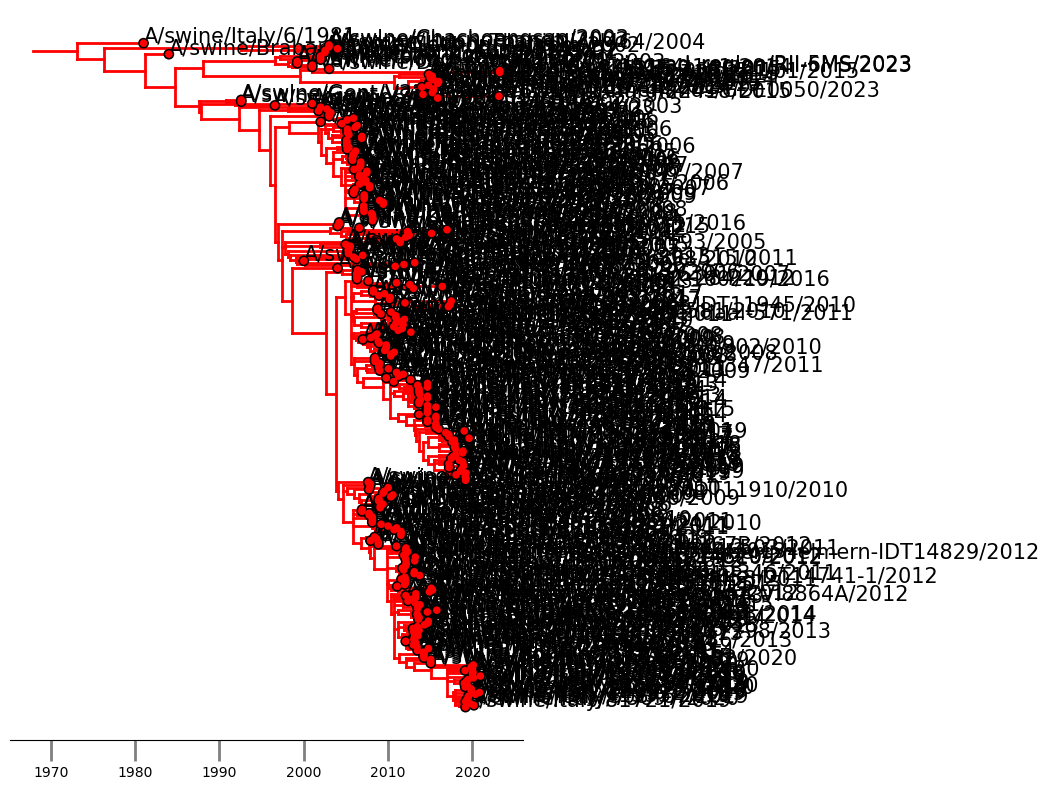

In [327]:
target_subtree = swine_trees["NA"][1]

fig, ax = plt.subplots(figsize=(10, 8))

x_attr = lambda k: k.traits["num_date"]

target_subtree.plotTree(ax, x_attr=x_attr, colour='red')  
target_subtree.plotPoints(ax, x_attr=x_attr, size=30, colour='red', zorder=100)

target_func = lambda k: k.is_leaf()  # Which branches will be annotated
text_func = lambda k: k.traits['name']

target_subtree.addText(ax, x_attr=x_attr, target=target_func, text=text_func, size = '15')

ax.set_yticks([])
ax.set_yticklabels([])
[ax.spines[loc].set_visible(False) for loc in ax.spines if loc not in ['bottom']]
ax.tick_params(axis='x',labelsize=10,size=15, width=2,color='grey')
fig.tight_layout()
plt.show()


In [470]:
# for k in avian_trees["PB2"][0].Objects:
#     if k.is_leaf():
#         print(k.traits["name"])
#     if k is avian_trees["PB2"][0].root:
#         print(k.traits["name"])



In [37]:
avian_na_tree = {gene: [] for gene in list_of_genes}

for k in avian_trees["HA"][0].Objects:
    if k.traits["name"] == "NODE_0000591":
        subtree = avian_trees["HA"][0].subtree(k)
        avian_na_tree["HA"].append(subtree)

        
for k in avian_trees["MP"][0].Objects:
    if k.traits["name"] == "NODE_0001599":
        subtree = avian_trees["MP"][0].subtree(k)
        avian_na_tree["MP"].append(subtree)

        
for k in avian_trees["NP"][0].Objects:
    if k.traits["name"] == "NODE_0001304":
        subtree = avian_trees["NP"][0].subtree(k)
        avian_na_tree["NP"].append(subtree) 
        
for k in avian_trees["PB2"][1].Objects:
    if k.traits["name"] == "NODE_0003184":
        subtree = avian_trees["PB2"][1].subtree(k)
        avian_na_tree["PB2"].append(subtree)  
        
            
print(avian_na_tree)

{'HA': [<baltic.baltic.tree object at 0x3c107e200>], 'PB1': [], 'PB2': [<baltic.baltic.tree object at 0x3c1987b80>], 'PA': [], 'MP': [<baltic.baltic.tree object at 0x3c35a5240>], 'NP': [<baltic.baltic.tree object at 0x303d1fe80>], 'NA': [], 'NS': []}


In [22]:
avian_eurasian_tree = {gene: [] for gene in list_of_genes}

for k in avian_trees["HA"][0].Objects:
    if k.traits["name"] == "NODE_0001516":
        subtree = avian_trees["HA"][0].subtree(k)
        avian_eurasian_tree["HA"].append(subtree)
        
for k in avian_trees["MP"][0].Objects:
    if k.traits["name"] == "NODE_0002312":
        subtree = avian_trees["MP"][0].subtree(k)
        avian_eurasian_tree["MP"].append(subtree) 
        
for k in avian_trees["NP"][0].Objects:
    if k.traits["name"] == "NODE_0001316":
        subtree = avian_trees["NP"][0].subtree(k)
        avian_eurasian_tree["NP"].append(subtree)

        
for k in avian_trees["PA"][1].Objects:
    if k.traits["name"] == "NODE_0002651":
        subtree = avian_trees["PA"][1].subtree(k)
        avian_eurasian_tree["PA"].append(subtree)
                
            
print(avian_eurasian_tree)

{'HA': [<baltic.baltic.tree object at 0x3c20eb940>], 'PB1': [], 'PB2': [], 'PA': [<baltic.baltic.tree object at 0x3c99417e0>], 'MP': [<baltic.baltic.tree object at 0x3b1a6f370>], 'NP': [<baltic.baltic.tree object at 0x3be15c250>], 'NA': [], 'NS': []}


In [7]:
canineH3N2_trees = {gene: [] for gene in list_of_genes}
canine_leaves = {gene: [] for gene in list_of_genes}

for gene in list_of_genes:
    for host, tree in host_trees[gene]["Canine"]:
        if host == "Avian":
            canineH3N2_trees[gene].append(tree)
            for k in tree.Objects:
                if k.is_leaf():
                    canine_leaves[gene].append(k.traits["name"])

In [31]:
#this is to use to make downsampled alignment files for the bhatt/mk test
for gene in list_of_genes:
    with open(f'./leaves/canineh3n2_leaves_{gene}.tsv', 'w') as f:
        for leaf in canine_leaves[gene]:
            f.write(f"{leaf}\n")  


In [37]:
canineH3N8_trees = {gene: [] for gene in list_of_genes}

for gene in list_of_genes:
    for host, tree in host_trees[gene]["Canine"]:
        if host == "Equine":
            canineH3N8_trees[gene].append(tree)
            
print(canineH3N8_trees)

{'HA': [<baltic.baltic.tree object at 0x330b21420>], 'PB1': [<baltic.baltic.tree object at 0x32d62f550>], 'PB2': [<baltic.baltic.tree object at 0x3330e9780>], 'PA': [<baltic.baltic.tree object at 0x37b852470>], 'MP': [<baltic.baltic.tree object at 0x3949d8550>], 'NP': [<baltic.baltic.tree object at 0x397bc3df0>], 'NA': [<baltic.baltic.tree object at 0x3ba9d1030>], 'NS': [<baltic.baltic.tree object at 0x38e386d40>]}


In [17]:
def tree_collecter(host_trees, host):
    
    host_dict = defaultdict(list)
    
    for gene, host_data in host_trees.items():

        for _, tree in host_data[host]:
            
            host_dict[gene].append(tree)

    return(host_dict)

In [44]:
equine_trees = tree_collecter(host_trees, "Equine")
print("Equine:")
print(equine_trees)
print("\n")

for gene, trees in equine_trees.items():
    for tree in trees:
        print(gene,tree)
        
print("\n")

        
swine_trees = tree_collecter(host_trees, "Swine")
print("Swine:")
print(swine_trees)
print("\n")

for gene, trees in swine_trees.items():
    for tree in trees:
        print(gene,tree)
print("\n")

human_trees = tree_collecter(host_trees, "Human")
print("Human:")
print(human_trees)
print("\n")

for gene, trees in human_trees.items():
    for tree in trees:
        print(gene,tree)
        
print("\n")

avian_trees = tree_collecter(host_trees, "Avian")
print("Avian:")
print(avian_trees)
print("\n")

for gene, trees in avian_trees.items():
    for tree in trees:
        print(gene,tree)

Equine:
defaultdict(<class 'list'>, {'HA': [<baltic.baltic.tree object at 0x32d543550>], 'PB1': [<baltic.baltic.tree object at 0x3474232e0>], 'PB2': [<baltic.baltic.tree object at 0x35cabafb0>], 'PA': [<baltic.baltic.tree object at 0x358784790>], 'MP': [<baltic.baltic.tree object at 0x339e98dc0>], 'NP': [<baltic.baltic.tree object at 0x3833fb130>, <baltic.baltic.tree object at 0x39721fee0>], 'NA': [<baltic.baltic.tree object at 0x38b056590>], 'NS': [<baltic.baltic.tree object at 0x3afffadd0>]})


HA <baltic.baltic.tree object at 0x32d543550>
PB1 <baltic.baltic.tree object at 0x3474232e0>
PB2 <baltic.baltic.tree object at 0x35cabafb0>
PA <baltic.baltic.tree object at 0x358784790>
MP <baltic.baltic.tree object at 0x339e98dc0>
NP <baltic.baltic.tree object at 0x3833fb130>
NP <baltic.baltic.tree object at 0x39721fee0>
NA <baltic.baltic.tree object at 0x38b056590>
NS <baltic.baltic.tree object at 0x3afffadd0>


Swine:
defaultdict(<class 'list'>, {'HA': [<baltic.baltic.tree object at 0x33283

In [68]:
#regional trees

swineEuro_trees = {
    "HA": [swine_trees["HA"][0]],
    "NA": [swine_trees["NA"][1]],
    "PB1": [swine_trees["PB1"][0]],
    "MP": [swine_trees["MP"][1]],
    "NP": [swine_trees["NP"][2]],
    "NS": [swine_trees["NS"][1]],
    "PA": [swine_trees["PA"][0]],
    "PB2": [swine_trees["PB2"][1]]
}


swineNA_trees = {
    "HA": [swine_trees["HA"][3]],
    "NA": [swine_trees["NA"][8]],
    "PB1": [swine_trees["PB1"][2]],
    "MP": [swine_trees["MP"][0]], #not the main one, the they are fractured
    "NP": [swine_trees["NP"][0]],
    "NS": [swine_trees["NS"][0]],
    "PA": [swine_trees["PA"][2]],
    "PB2": [swine_trees["PB2"][2]]
}

avianNA_trees = {
    "HA": avian_na_tree["HA"], #only one tree for avian HA, had to subset it manually
    "NA": [avian_trees["NA"][1]], #lower na clade
    "PB1": [avian_trees["PB1"][1]],
    "MP": avian_na_tree["MP"], #not the main one, the they are fractured
    "NP": avian_na_tree["NP"],
    "NS": [avian_trees["NS"][1]], #lower ns clade
    "PA": [avian_trees["PA"][1]],#combines two NA clades
    "PB2": avian_na_tree["PB2"]
}

avianEurasia_trees = {
    "HA": avian_eurasian_tree["HA"], #only one tree for avian HA, had to subset it manually
    "NA": [avian_trees["NA"][1]], #not really a defined clade
    "PB1": [avian_trees["PB1"][0]],
    "MP": avian_eurasian_tree["MP"], 
    "NP": avian_eurasian_tree["NP"],
    "NS": [avian_trees["NS"][0]],
    "PA": avian_eurasian_tree["PA"],
    "PB2": [avian_trees["PB2"][0]]
}

In [151]:
def getLeavesInTreeRegion(clade: dict, list_of_genes: list, region: list, regional = False):
    
    clade_leaves = {gene: [] for gene in list_of_genes}
    
    for gene in list_of_genes:
        for tree in clade[gene]:  
            for k in tree.Objects:  
                if k.is_leaf():
                    if regional and k.traits.get("region") not in region:
                        continue
                    else:
                        clade_leaves[gene].append(k.traits["name"])
    return clade_leaves
    
def leaves(clade_leaves: dict, clade: str, list_of_genes: list):
    for gene in list_of_genes:
        with open(f'./leaves/{clade}/{clade}_leaves_{gene}.tsv', 'w') as f:
            for leaf in clade_leaves[gene]:
                f.write(f"{leaf}\n") 

In [156]:
eurasia = ['Europe', 'Japan Korea', 'China', 'West Asia', 'Southeast Asia']
clade_leaves = getLeavesInTreeRegion(avian_trees, list_of_genes, ["Europe"], regional = False)
leaves(clade_leaves, "allAvian", list_of_genes)

In [10]:
def mutation_counter(target_subtree, list_of_genes, region, regional = False, eurasia = False):
    
    all_genes_data = {gene: None for gene in list_of_genes}
        
    for gene, trees in target_subtree.items():
        branch_data = {}

        for tree in trees:

            for k in tree.Objects:
                    
                    if regional:
                        
                        if eurasia:
                            if k.traits["region"] not in region:
                                continue
                                
                        elif k.traits["region"] != region:
                            continue
                            
                        
                    if k != tree.root:

                        name = k.traits["name"]
                        date = k.traits["num_date"] - k.parent.traits["num_date"] 
                        nt_mutations = [mut for mut in k.traits["branch_attrs"]["mutations"].get("nuc", []) if "-" not in mut and "N" not in mut]
                        all_nt = len(nt_mutations)

                        if gene == "MP":
                            aa_mutations = []
                            for sub_gene in ["M1", "M2"]:
                                aa_mutations.extend([
                                    mut for mut in k.traits["branch_attrs"]["mutations"].get(sub_gene, [])
                                    if "-" not in mut and "X" not in mut
                                ])

                        elif gene == "NS":
                            aa_mutations = []
                            for sub_gene in ["NEP", "NS1"]:
                                aa_mutations.extend([
                                    mut for mut in k.traits["branch_attrs"]["mutations"].get(sub_gene, [])
                                    if "-" not in mut and "X" not in mut
                                ])
                        else:
                            aa_mutations = [
                                mut for mut in k.traits["branch_attrs"]["mutations"].get(f"{gene}", [])
                                if "-" not in mut and "X" not in mut
                            ]

                        nonsyn = len(aa_mutations)
                        syn = all_nt - nonsyn
                        branch_data[name] = (date, all_nt, nonsyn, syn)

            all_genes_data[gene] = branch_data
                                    

    return(all_genes_data)

In [55]:
def blength_plotter_whole(all_genes_data, list_of_genes, blength_cutoff, save, path):    
    
    gene_plot_data = {gene: [] for gene in list_of_genes}
    nonsyn_names = {gene: [] for gene in list_of_genes}
    syn_names = {gene: [] for gene in list_of_genes}

    nonsyn_percentiles = {}
    syn_percentiles = {}

    for gene in list_of_genes:
        branch_data = all_genes_data[gene]

        nonsyn_values = []
        syn_values = []

        for name, (date, all_nt, nonsyn, syn) in branch_data.items():
            if date > blength_cutoff and syn >= 0: 
                nonsyn_value = nonsyn / date
                syn_value = syn / date
                gene_plot_data[gene].append((name, nonsyn_value, syn_value))
                nonsyn_values.append(nonsyn_value)
                syn_values.append(syn_value)

        nonsyn_percentiles[gene] = np.percentile(nonsyn_values, 95)
        syn_percentiles[gene] = np.percentile(syn_values, 95)

    x_values = range(len(list_of_genes))
    plt.figure(figsize=(12, 8))

    offset = 0.1 

    for i, gene in enumerate(list_of_genes):
        y_values = gene_plot_data[gene]

        for j, (name, nonsyn_value, syn_value) in enumerate(y_values):
            plt.scatter(i - offset, nonsyn_value, color='darkblue', s=50, edgecolor=None)
            plt.scatter(i + offset, syn_value, color='lightblue', s=50, edgecolor=None)
            plt.hlines(y=nonsyn_percentiles[gene], xmin=i - 0.4, xmax=i + 0.4, color='darkblue', linestyle='--', linewidth=1)
            plt.hlines(y=syn_percentiles[gene], xmin=i - 0.4, xmax=i + 0.4, color='lightblue', linestyle='--', linewidth=1)

            if nonsyn_value > nonsyn_percentiles[gene]:
                nonsyn_names[gene].append((name, nonsyn_value))
                # plt.text(i - offset, nonsyn_value, name, fontsize=9, ha='right', color='black')
            if syn_value > syn_percentiles[gene]:
                syn_names[gene].append((name, syn_value))
                # plt.text(i + offset, syn_value, name, fontsize=9, ha='left', color='black')
                
            # if gene == "NA":
            #      if nonsyn_value > nonsyn_percentiles["NA"]:
            #         plt.text(i - offset, nonsyn_value, name, fontsize=9, ha='right', color='black')
            # if gene == "HA":
            #      if nonsyn_value > nonsyn_percentiles["HA"]:
            #         plt.text(i - offset, nonsyn_value, name, fontsize=9, ha='right', color='black')
            
    plt.xticks(x_values, list_of_genes, rotation=45)
    plt.ylabel("nonsyn / branch length & syn / branch length")

    handles = [
        plt.Line2D([0], [0], marker='o', color='w', label='nonsyn / branch length', markerfacecolor='darkblue', markersize=10),
        plt.Line2D([0], [0], marker='o', color='w', label='syn / branch length', markerfacecolor='lightblue', markersize=10),
        plt.Line2D([0], [0], color='darkblue', linestyle='--', linewidth=1, label='nonsyn 95th percentile'),
        plt.Line2D([0], [0], color='lightblue', linestyle='--', linewidth=1, label='syn 95th percentile')
    ]

    plt.legend(handles=handles, loc='upper left')
    
    if save:
        
        try:
            os.mkdir(path)

        except OSError as error:
            pass
        
        with open(f'{path}/{blength_cutoff}_nonsyn_list.txt', 'w') as f:
            for gene, nodes in nonsyn_names.items():
                f.write(f"{gene} \n {nodes}\n")
        with open(f'{path}/{blength_cutoff}_syn_list.txt', 'w') as f:
            for gene1, nodes1 in syn_names.items():
                f.write(f"{gene1} \n {nodes1}\n")

        plt.savefig(f'{path}/_{blength_cutoff}.pdf')
        
    plt.tight_layout()
    plt.show()


In [79]:
def blength_plotter(all_genes_data, list_of_genes, blength_cutoff, save, path):    
    
    gene_plot_data = {gene: [] for gene in list_of_genes}
    nonsyn_names = {gene: [] for gene in list_of_genes}
    syn_names = {gene: [] for gene in list_of_genes}

    nonsyn_percentiles = {}
    syn_percentiles = {}

    for gene in list_of_genes:
        branch_data = all_genes_data[gene]

        nonsyn_values = []
        syn_values = []

        for name, (date, all_nt, nonsyn, syn) in branch_data.items():
            # if name.startswith("NODE_") and date > blength_cutoff and syn >= 0:
            if date > blength_cutoff and syn >= 0:
                nonsyn_value = nonsyn / date
                syn_value = syn / date
                gene_plot_data[gene].append((name, nonsyn_value, syn_value))
                nonsyn_values.append(nonsyn_value)
                syn_values.append(syn_value)

        nonsyn_percentiles[gene] = np.percentile(nonsyn_values, 95)
        syn_percentiles[gene] = np.percentile(syn_values, 95)

    for gene, data in gene_plot_data.items():

        names, nonsyn_values, syn_values = zip(*data)

        plt.figure(figsize=(8, 6))
        plt.scatter(syn_values, nonsyn_values, color = "black", alpha=0.7, label=f"{gene}")
        plt.axhline(nonsyn_percentiles[gene], color='#d73027', linestyle='--', label="95th % nonsyn")
        plt.axvline(syn_percentiles[gene], color='#4575b4', linestyle='--', label="95th % syn")

        for name, nonsyn_value, syn_value in zip(names, nonsyn_values, syn_values):
            if name.startswith("NODE_") and nonsyn_value > nonsyn_percentiles[gene] and syn_value <= syn_percentiles[gene]:
            # if nonsyn_value > nonsyn_percentiles[gene] and syn_value <= syn_percentiles[gene]:
                plt.text(syn_value, nonsyn_value, name, fontsize=8, ha='left', va='bottom')
        
        #line of best fit
        # coeffs = np.polyfit(syn_values, nonsyn_values, 1)
        # best_fit_line = np.poly1d(coeffs) 
        # x_fit = np.linspace(min(syn_values), max(syn_values), 100)
        # y_fit = best_fit_line(x_fit)
        # plt.plot(x_fit, y_fit, color='darkgrey', linestyle='--', linewidth=2)
        
        handles = [
        plt.Line2D([0], [0], color='#d73027', linestyle='--', linewidth=1, label='nonsyn 95th percentile'),
        plt.Line2D([0], [0], color='#4575b4', linestyle='--', linewidth=1, label='syn 95th percentile')
            ]
        
        plt.title(f"{gene}")
        plt.xlabel("syn subs / branch length")
        plt.ylabel("nonsyn subs / branch length")
        # plt.legend()
        plt.grid(True)

        # plt.legend(handles=handles, loc='upper left')
        if save:
            
            try:  
                os.mkdir(path)

            except OSError as error:
                pass
            
            plt.savefig(f'{path}/{blength_cutoff}_{gene}.pdf')
            
        plt.tight_layout()
        plt.show()


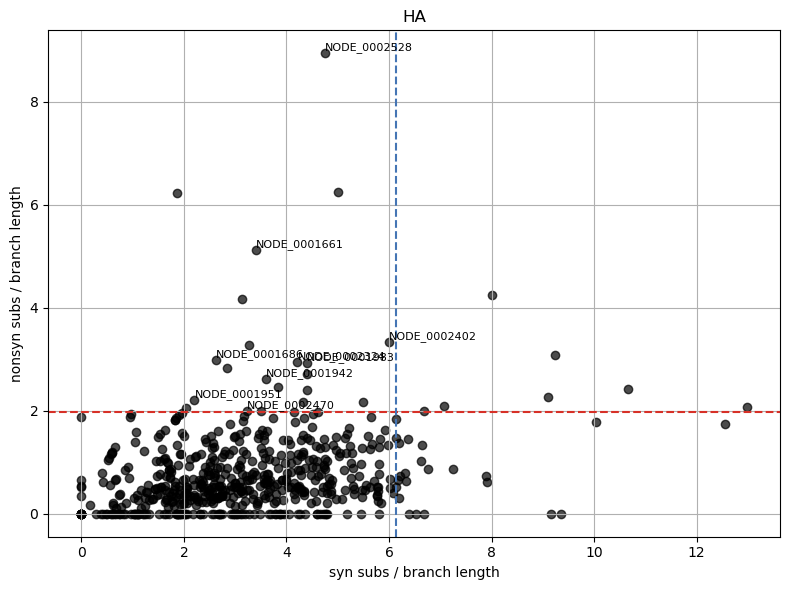

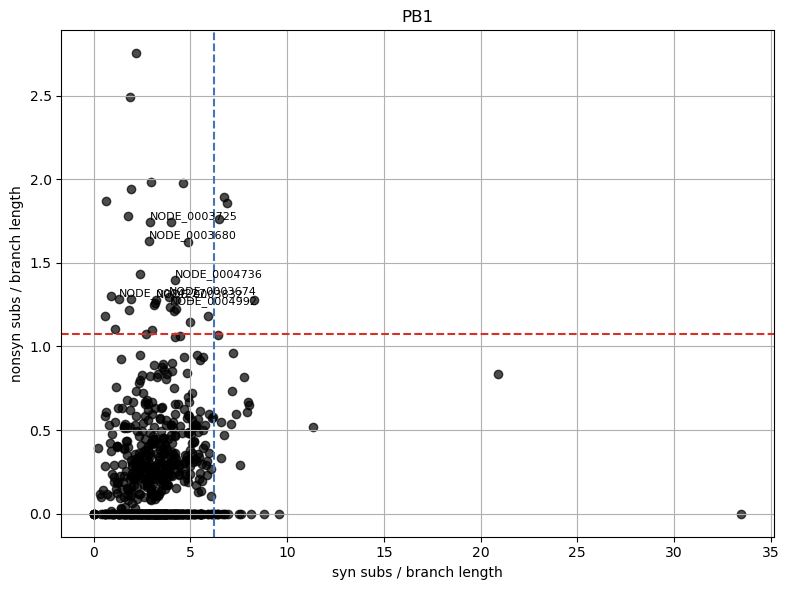

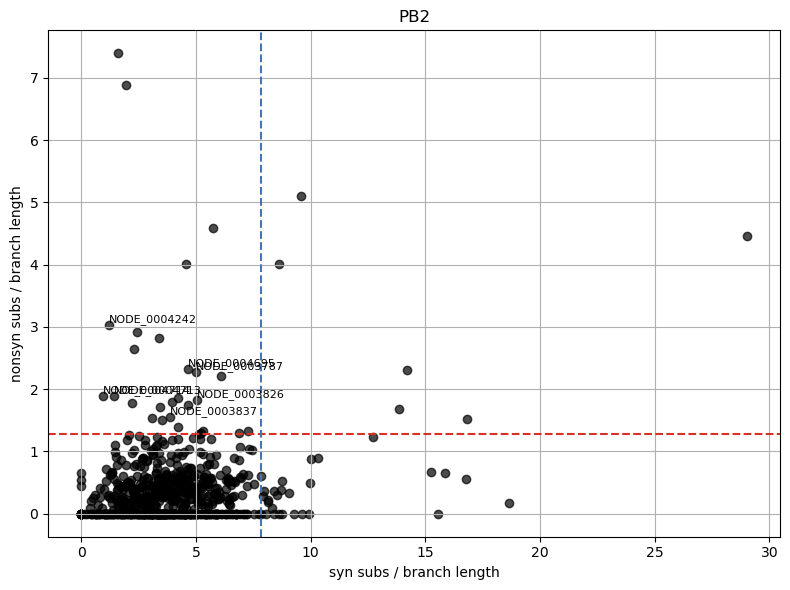

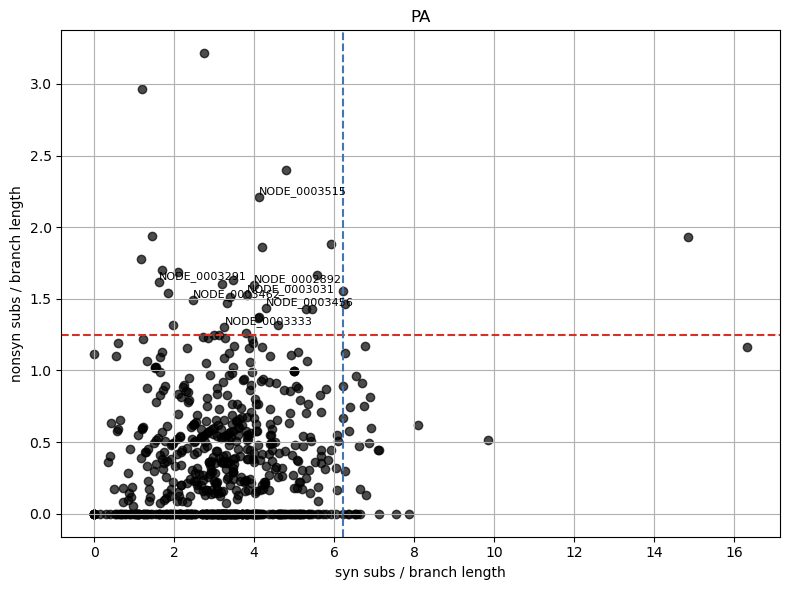

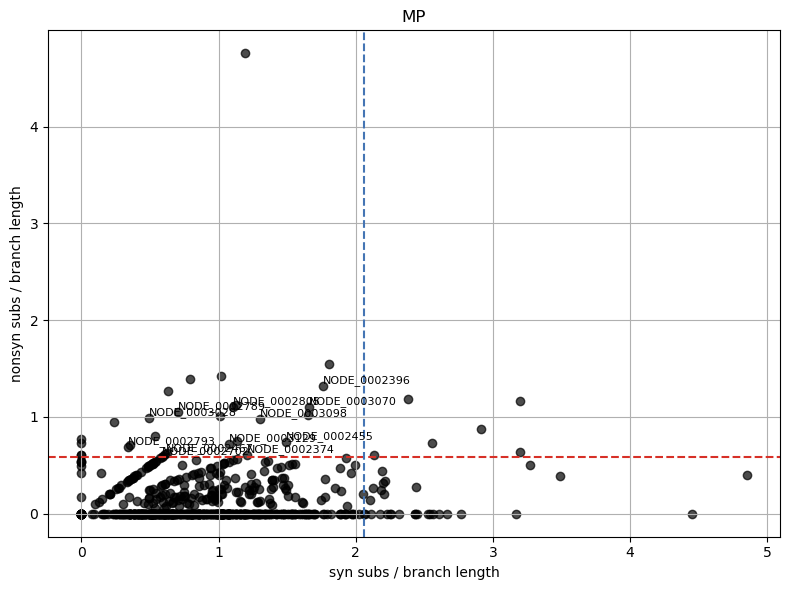

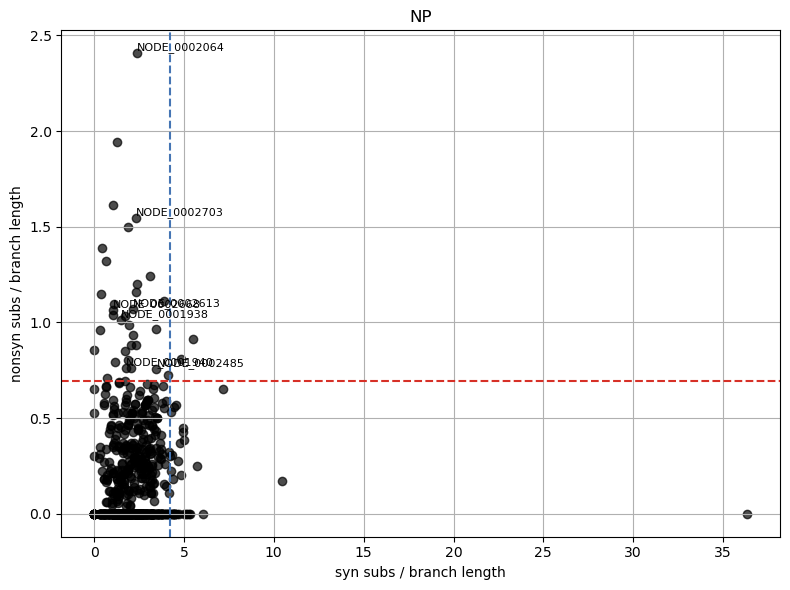

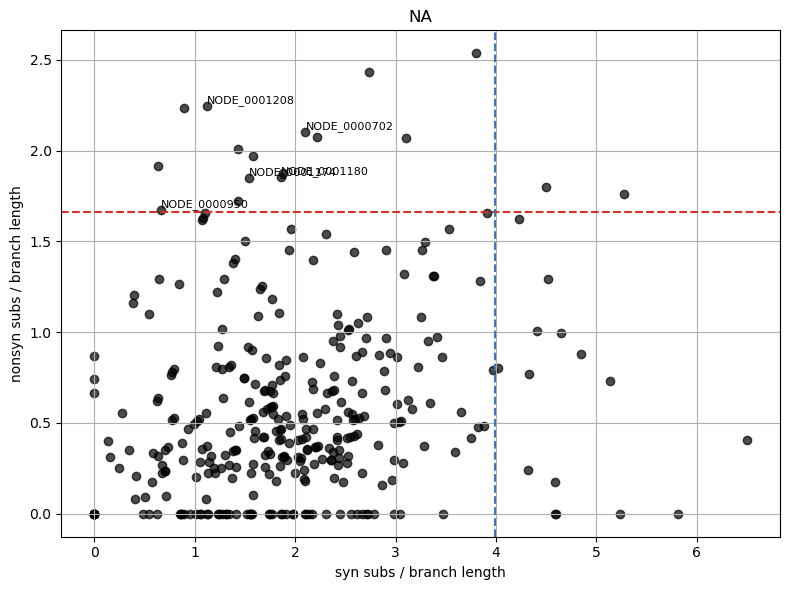

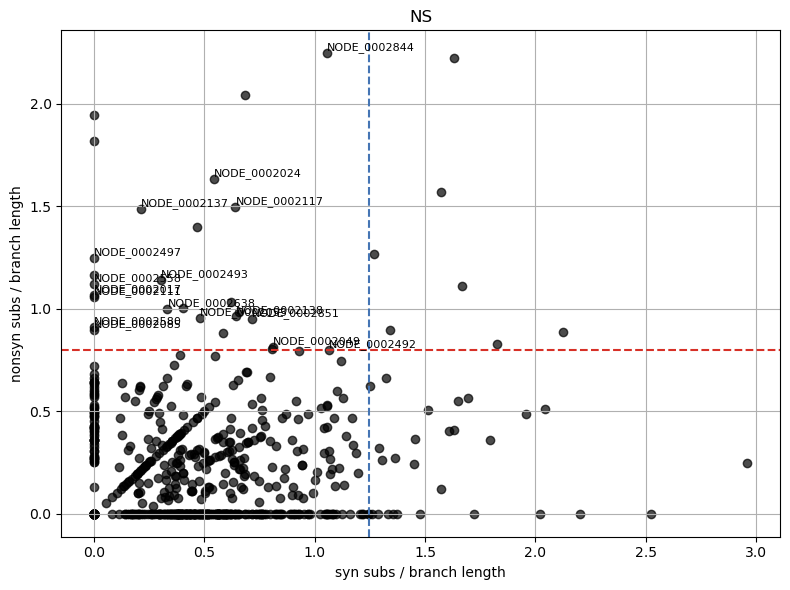

In [80]:
target_subtree = avianEurasia_trees
clade = "avian_eurasian"

eurasia = ['Europe', 'Japan Korea', 'China', 'West Asia', 'Southeast Asia']

#date, all_nt, nonsyn, syn

all_genes_data = mutation_counter(target_subtree, list_of_genes, eurasia, True, True)

# print(json.dumps(all_genes_data, indent = 4))
blength_plotter(all_genes_data,list_of_genes, 1.5, True, f"./indv_plots/{clade}/just_nodes")

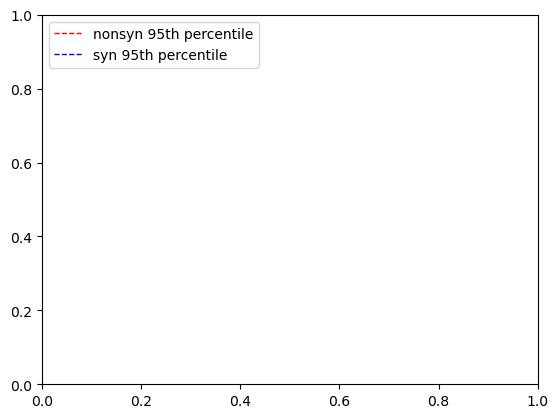

In [61]:
handles = [
        plt.Line2D([0], [0], color='red', linestyle='--', linewidth=1, label='nonsyn 95th percentile'),
        plt.Line2D([0], [0], color='blue', linestyle='--', linewidth=1, label='syn 95th percentile')
            ]
plt.legend(handles=handles, loc='upper left')

In [86]:
def blength_plotter_sub(all_genes_data, list_of_genes, blength_cutoff, save, path):

    gene_plot_data = {gene: [] for gene in list_of_genes}
    nonsyn_percentiles = {}
    syn_percentiles = {}
    

    for gene in list_of_genes:
        branch_data = all_genes_data[gene]
        nonsyn_values = []
        syn_values = []
        for name, (date, all_nt, nonsyn, syn) in branch_data.items():
            if date > blength_cutoff and syn >= 0:
                nonsyn_value = nonsyn / date
                syn_value = syn / date
                gene_plot_data[gene].append((name, nonsyn_value, syn_value))
                nonsyn_values.append(nonsyn_value)
                syn_values.append(syn_value)
        nonsyn_percentiles[gene] = np.percentile(nonsyn_values, 95)
        syn_percentiles[gene] = np.percentile(syn_values, 95)

    n_genes = len(list_of_genes)
    fig, axes = plt.subplots(2, 4, figsize=(20, 10), sharey=True)
    axes = axes.flatten()

    all_nonsyn_values = [nonsyn for data in gene_plot_data.values() for _, nonsyn, _ in data]
    all_syn_values = [syn for data in gene_plot_data.values() for _, _, syn in data]
    global_ymin = min(all_nonsyn_values)
    global_ymax = max(all_nonsyn_values)
    global_xmin = min(all_syn_values)
    global_xmax = max(all_syn_values)


    for i, gene in enumerate(list_of_genes):
        ax = axes[i]
        data = gene_plot_data[gene]

        names, nonsyn_values, syn_values = zip(*data)
        ax.scatter(syn_values, nonsyn_values, color="black", alpha=0.7, label=f"{gene}")
        ax.axhline(nonsyn_percentiles[gene], color='#d73027', linestyle='--', label="95th % nonsyn")
        ax.axvline(syn_percentiles[gene], color='#4575b4', linestyle='--', label="95th % syn")

        for name, nonsyn_value, syn_value in zip(names, nonsyn_values, syn_values):
            if name.startswith("NODE_") and nonsyn_value > nonsyn_percentiles[gene] and syn_value <= syn_percentiles[gene]:
                ax.text(syn_value, nonsyn_value, name, fontsize=8, ha='left', va='bottom')

        ax.set_title(f"{gene}")
        ax.set_xlabel("syn subs / branch length")
        if i % 4 == 0:  # Add y-label to the first column
            ax.set_ylabel("nonsyn subs / branch length")
        ax.grid(True)
        ax.set_ylim(global_ymin, global_ymax)
        ax.set_xlim(global_xmin, global_xmax)


    plt.tight_layout()
    if save:
        try:
            os.mkdir(path)
        except OSError:
            pass
        plt.savefig(f'{path}/{blength_cutoff}_all_genes.pdf')
    plt.show()


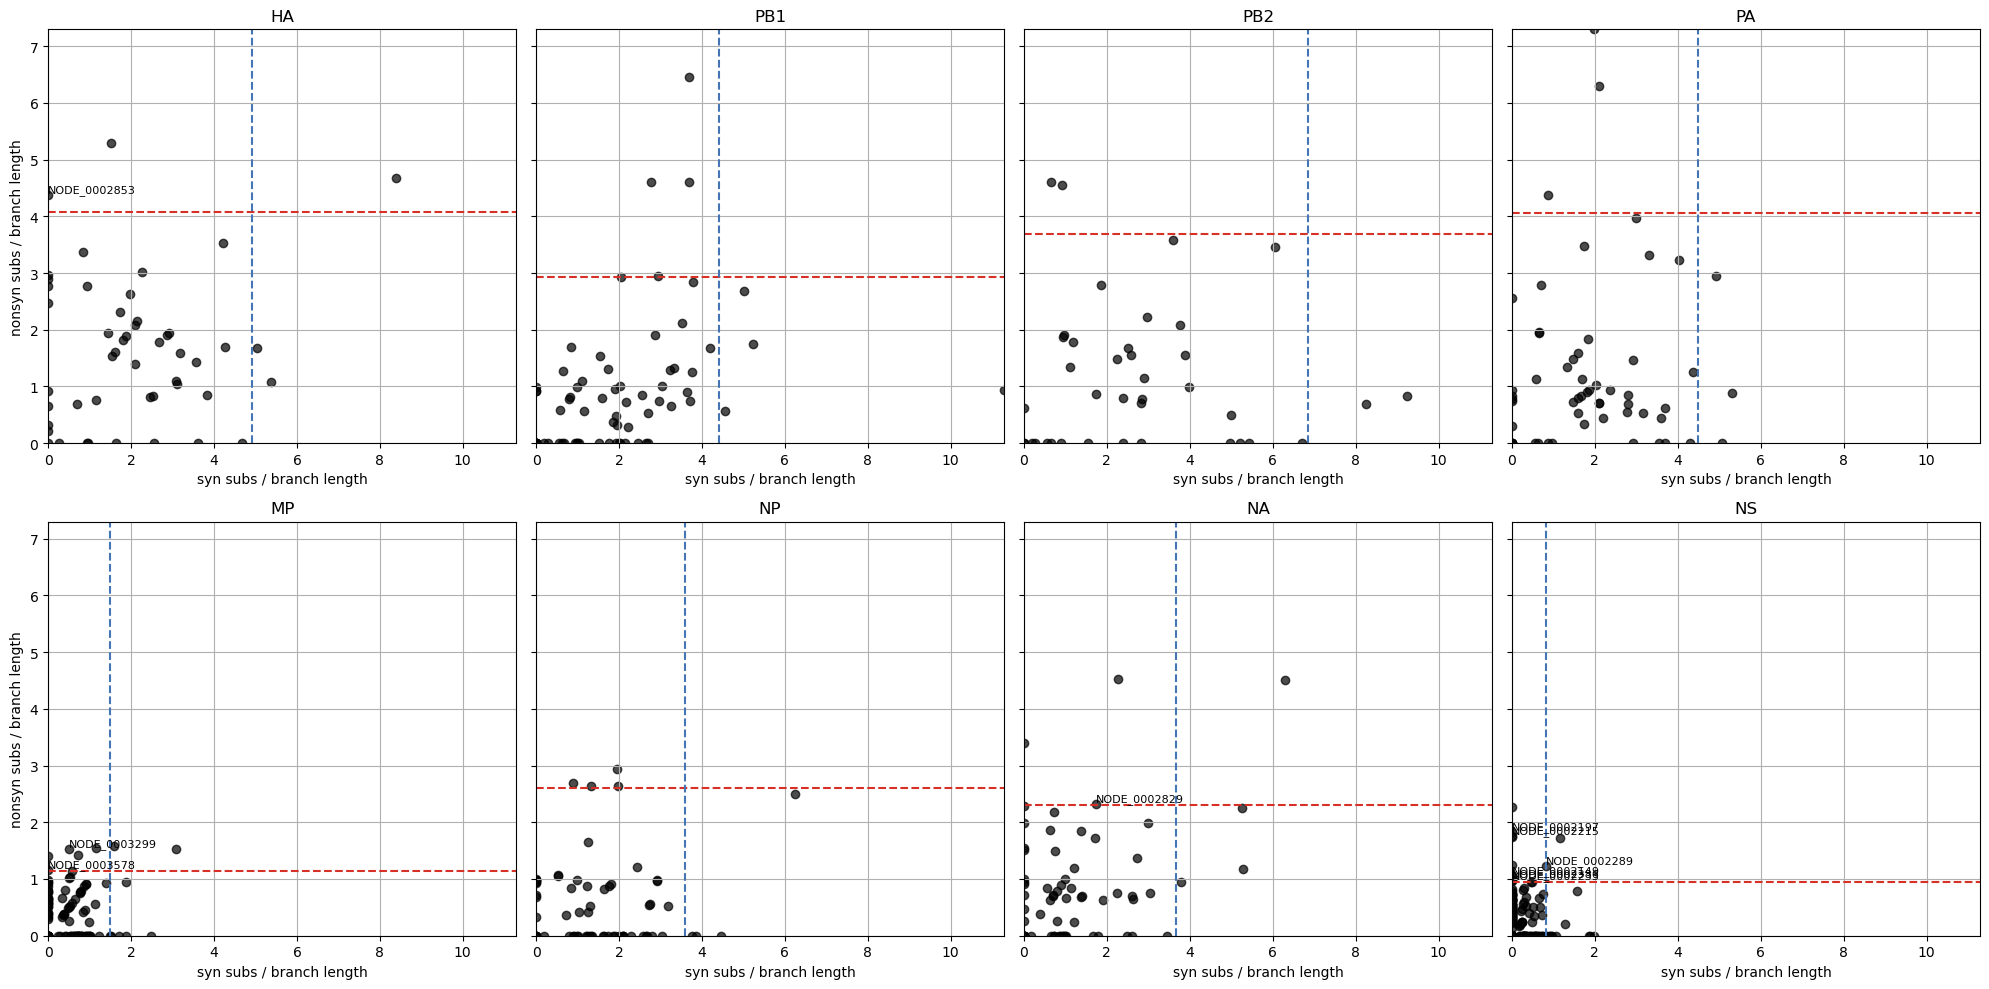

In [88]:
target_subtree = canineH3N2_trees
clade = "canineH3N2"

eurasia = ['Europe', 'Japan Korea', 'China', 'West Asia', 'Southeast Asia']

#date, all_nt, nonsyn, syn

all_genes_data = mutation_counter(target_subtree, list_of_genes, eurasia, False, False)

# print(json.dumps(all_genes_data, indent = 4))
blength_plotter_sub(all_genes_data,list_of_genes, 1, True, f"./indv_plots/{clade}/just_nodes")